**ECE 228 Project: Hurricane Prediction code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline


The data is stored in github and connected to colab notebook.

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/atlantic.csv")
data.head(3)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [4]:
data.isnull().sum(axis = 0)

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

Since there is no missing values, we don't have to handle them.

In [5]:
data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitudesign'] = data['Latitude'].str[-1]
data['Longitude1'] = data['Longitude'].str[:-1]
max(data['Longitude1'])
#data.head(5)


'99.9'

Preprocessing is done

In [6]:
!wget https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py
!wget https://github.com/Sang555/ece228/blob/main/projection_constants.json

--2022-06-10 02:44:55--  https://raw.githubusercontent.com/Sang555/ece228/main/lambert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6860 (6.7K) [text/plain]
Saving to: ‘lambert.py’

lambert.py          100%[===================>]   6.70K  --.-KB/s    in 0s      

2022-06-10 02:44:55 (96.0 MB/s) - ‘lambert.py’ saved [6860/6860]

--2022-06-10 02:44:55--  https://github.com/Sang555/ece228/blob/main/projection_constants.json
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘projection_constants.json’

projection_constant     [ <=>                ] 131.35K  --.-KB/s    in 0.04s   

2022-06-10 02:44:5

Below is the function to convert from latitude longitude to lcc cordinates and vice-versa. The code for this conversion is taken from another author to whom we would like to give credits: https://github.com/vraida/Lambert-projection/blob/master/python_implementation/lib/lambert.py

In [7]:
#@title
import numpy as np
import pandas as pd
import json
import httpimport

from lambert import Lambert

data['Latitude1'] = pd.to_numeric(data['Latitude1'])
data['Longitude1'] = pd.to_numeric(data['Longitude1'])
lat_true = data['Latitude1']
lon_true = data['Longitude1']

lamb = Lambert(
    standard_parallels=(33, 45),
    central_latitude=0, central_longitude=0,
    false_easting=400000, false_northing=400000,
    semimajor_axis = 6377397.155, inverse_flattening = 299.1528153513275
)

x_test, y_test = lamb.geographic2cartesian(lat_true, lon_true)
data['lcc_x'] = x_test
data['lcc_y'] = y_test



The below formula is used to calculate the translation direction of the storm.

In [8]:

data['difference_lat'] = data.groupby('ID')['Latitude1'].diff()
data['difference_lon'] = data.groupby('ID')['Longitude1'].diff()
data['trans_dir'] = np.arctan(data['difference_lat']/data['difference_lon'])

In [9]:
def haversine(coord1: object, coord2: object, lat2: object, lon2: object):
    '''
    This function is used to find distance between 2 coordinates. This function is referred from
    https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=For%20example%2C%20haversine(%CE%B8),longitude%20of%20the%20two%20points
    '''

    assert isinstance(coord1, float)
    assert isinstance(coord2, float)
    assert isinstance(lat2, float)
    assert isinstance(lon2, float)

    import math

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat2 - coord1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(coord1)
    delta_lambda = math.radians(coord2)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  
    km = meters / 1000.0 

    meters = round(meters, 3)/(6*3600)
    return meters



The below formula is used to calculate the translation direction of the storm.

In [10]:
data['trans_speed'] = data.apply(lambda x: haversine(x['difference_lat'],x['difference_lon'],x['Latitude1'],x['Longitude1']), axis=1)
data.head(5)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,High Wind NW,Latitude1,Latitudesign,Longitude1,lcc_x,lcc_y,difference_lat,difference_lon,trans_dir,trans_speed
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,28.0,N,94.8,8.218382e+06,8.295660e+06,NaN,NaN,NaN,NaN
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,28.0,N,95.4,8.248290e+06,8.347380e+06,0.0,0.6,0.000000,2.727200
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,28.0,N,96.0,8.277857e+06,8.399296e+06,0.0,0.6,0.000000,2.727200
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,28.1,N,96.5,8.292437e+06,8.448174e+06,0.1,0.5,0.197396,2.329212
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,28.2,N,96.8,8.297119e+06,8.479684e+06,0.1,0.3,0.321751,1.455758


In [11]:
data2 = data.groupby('ID').filter(lambda x: len(x) > 6)
data_lstm = data2

In [12]:
data_lstm.to_csv('sample_data/lstm.csv')


The data is saved here and fed to matlab. Other features are added and the new data is loaded.

In [13]:
data_lstm = pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/lstm_m.csv")

The data is then normalized and the normalization constants are noted.

In [14]:
df_max_scaled = data_lstm.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
  if not isinstance(df_max_scaled[column][0],str):
    d_min = df_max_scaled[column].abs().min()
    d_max = df_max_scaled[column].abs().max()
    d = d_max-d_min
    df_max_scaled[column] = (df_max_scaled[column] - d_min)/ d
    if column == "lcc_x":
      print("lcc_x")
      print(d, d_min)
      
    if column == "lcc_y":
      print("lcc_y")
      print(d, d_min)

    if column == "Latitude1":
      print("Latitude1")
      print(d, d_min)

    if column == "Longitude1":
      print("Longitude1")
      print(d, d_min)


Latitude1
73.8 7.2
Longitude1
359.1 0.0
lcc_x
9483432.641 400000.0
lcc_y
16234904.081 1693736.969


In [15]:
lcc_x = 9483432.641
lcc_y = 16234904.081
lat1 = 73.8
lon1 = 359.1
lcc_x_min = 400000.0
lcc_y_min = 1693736.969
lat1_min = 7.2
lon1_min = 0.0

In [16]:
df_max_scaled2 = df_max_scaled.drop(columns=['Unnamed: 0','Unnamed: 10','Date', 'Time', 'Event', 'Status',
       'Latitude', 'Longitude','difference_lat', 'difference_lon','Unnamed: 19'])

In [17]:
df_max_scaled2#.to_csv('sample_data/lstm_filtered.csv')

,ID,Name,Maximum Wind,Latitude1,Longitude1,lcc_x,lcc_y,trans_dir,trans_speed,P1,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
0,AL011851,UNNAMED,0.451613,0.281843,0.263993,0.824425,0.406650,NaN,NaN,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
1,AL011851,UNNAMED,0.451613,0.281843,0.265664,0.827579,0.409836,0.000000,0.067364,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
2,AL011851,UNNAMED,0.451613,0.281843,0.267335,0.830697,0.413034,0.000000,0.067364,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
3,AL011851,UNNAMED,0.451613,0.283198,0.268727,0.832234,0.416044,0.125666,0.057534,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
4,AL011851,UNNAMED,0.451613,0.284553,0.269563,0.832728,0.417985,0.204833,0.035959,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48787,AL122015,KATE,0.290323,0.462060,0.140351,0.420593,0.290658,-0.434376,0.226162,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
48788,AL122015,KATE,0.290323,0.470190,0.138959,0.413200,0.292797,-0.557716,0.089896,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
48789,AL122015,KATE,0.258065,0.464770,0.137009,0.410389,0.288615,0.330499,0.083688,0.113333,...,0.29200,0.360000,0.360000,0.040000,0.040000,0.146667,0.120000,0.260000,0.12000,0.040000
48790,AL122015,KATE,0.225806,0.455285,0.132275,0.401624,0.280072,0.248668,0.185515,0.076319,...,0.28266,0.318182,0.409091,0.048822,0.050505,0.222222,0.156566,0.240741,0.09596,0.047138


In [18]:
from pandas.core.arrays.sparse import dtype
for col in df_max_scaled2.columns[2:]:
  df_max_scaled2[col] = df_max_scaled2[col].astype(dtype=np.float)
df_max_scaled2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


All the storms with less than 10 records are dropped as we need 5 inputs and 5 outputs.

In [19]:
df_max_scaled3 = df_max_scaled2.groupby('ID').filter(lambda x: len(x) > 9)

In [20]:
df_max_scaled3.groupby('ID').count()

,Name,Maximum Wind,Latitude1,Longitude1,lcc_x,lcc_y,trans_dir,trans_speed,P1,P2,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
ID,,,,,,,,,,,,,,,,,,,,,
AL011851,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
AL011852,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
AL011854,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
AL011856,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
AL011860,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL282005,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AL291969,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
AL292005,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


In [21]:
df_max_scaled3.to_csv('sample_data/df3scaled.csv')

The original model is the one which uses without the displacement probability , i.e. df_max_scaled_orig data is without new added features

In [22]:
df_max_scaled_orig = df_max_scaled3[df_max_scaled3.columns[:9]]

Few storms are taken for testing.

In [23]:
test_storm1 = df_max_scaled3[df_max_scaled3['ID']=='AL111898']
test_storm1_orig = df_max_scaled_orig[df_max_scaled_orig['ID']=='AL111898']


In [24]:
test_storm2 = df_max_scaled3[df_max_scaled3['ID']=='AL091898']
test_storm2_org = df_max_scaled_orig[df_max_scaled_orig['ID']=='AL091898']

In [25]:
test_storm3 = df_max_scaled3[df_max_scaled3['ID']=='AL071898']
test_storm3_org = df_max_scaled_orig[df_max_scaled_orig['ID']=='AL091898']

In [26]:
kendra = df_max_scaled3[df_max_scaled3['ID']=='AL231978']
laurie = df_max_scaled3[df_max_scaled3['ID']=='AL261969']
martha = df_max_scaled3[df_max_scaled3['ID']=='AL291969']
twentytwo = df_max_scaled3[df_max_scaled3['ID']=='AL232005']
vince = df_max_scaled3[df_max_scaled3['ID']=='AL232005']
wilma = df_max_scaled3[df_max_scaled3['ID']=='AL252005']
zeta = df_max_scaled3[df_max_scaled3['ID']=='AL312005']

The data is grouped and formatted to send to the lstm model i.e. data for many steps are combined. The _o suffix in the following blocks indicate the model without displacement probabilties.

In [28]:
dataX_o, dataY1_o, dataY2_o, dataY3_o, dataY4_o, dataY5_o = [], [], [], [], [], []
for i in range(len(df_max_scaled_orig)-10-1):
  x = df_max_scaled_orig.iloc[i:(i+10), 2:]
  x1 =  df_max_scaled_orig.iloc[i:(i+10), 0]
  if x1.iloc[0] == x1.iloc[-1] and not x.isnull().values.any():
     dataX_o.append(x.iloc[:-5,:])
     dataY1_o.append(x.iloc[-5,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY2_o.append(x.iloc[-4,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY3_o.append(x.iloc[-3,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY4_o.append(x.iloc[-2,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY5_o.append(x.iloc[-1,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
    

In [29]:
dataX, dataY1, dataY2, dataY3, dataY4, dataY5 = [], [], [], [], [], []
for i in range(len(df_max_scaled3)-10-1):
  x = df_max_scaled3.iloc[i:(i+10), 2:]
  x1 =  df_max_scaled3.iloc[i:(i+10), 0]
  if x1.iloc[0] == x1.iloc[-1] and not x.isnull().values.any():
     dataX.append(x.iloc[:-5,:])
     dataY1.append(x.iloc[-5,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY2.append(x.iloc[-4,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY3.append(x.iloc[-3,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY4.append(x.iloc[-2,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
     dataY5.append(x.iloc[-1,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
    


The data is converted to format required for lstm

In [30]:
trainX = np.array(dataX[:-4228]).astype('float32')
trainY1 =  np.array(dataY1[:-4228]).astype('float32')
trainY2 =  np.array(dataY2[:-4228]).astype('float32')
trainY3 =  np.array(dataY3[:-4228]).astype('float32')
trainY4 =  np.array(dataY4[:-4228]).astype('float32')
trainY5 =  np.array(dataY5[:-4228]).astype('float32')
validX = np.array(dataX[-4228:-1128]).astype('float32')
validY1 =  np.array(dataY1[-4228:-1128]).astype('float32')
validY2 =  np.array(dataY2[-4228:-1128]).astype('float32')
validY3 =  np.array(dataY3[-4228:-1128]).astype('float32')
validY4 =  np.array(dataY4[-4228:-1128]).astype('float32')
validY5 =  np.array(dataY5[-4228:-1128]).astype('float32')
testX = np.array(dataX[7837:-8]).astype('float32')
testY1 =  np.array(dataY1[7837:-8]).astype('float32')
testY2 =  np.array(dataY2[7837:-8]).astype('float32')
testY3 =  np.array(dataY3[7837:-8]).astype('float32')
testY4 =  np.array(dataY4[7837:-8]).astype('float32')
testY5 =  np.array(dataY5[7837:-8]).astype('float32')

In [31]:
trainX_o = np.array(dataX_o[:-4228]).astype('float32')
trainY1_o =  np.array(dataY1_o[:-4228]).astype('float32')
trainY2_o =  np.array(dataY2_o[:-4228]).astype('float32')
trainY3_o =  np.array(dataY3_o[:-4228]).astype('float32')
trainY4_o =  np.array(dataY4_o[:-4228]).astype('float32')
trainY5_o =  np.array(dataY5_o[:-4228]).astype('float32')
validX_o = np.array(dataX_o[-4228:-1128]).astype('float32')
validY1_o =  np.array(dataY1_o[-4228:-1128]).astype('float32')
validY2_o =  np.array(dataY2_o[-4228:-1128]).astype('float32')
validY3_o =  np.array(dataY3_o[-4228:-1128]).astype('float32')
validY4_o =  np.array(dataY4_o[-4228:-1128]).astype('float32')
validY5_o =  np.array(dataY5_o[-4228:-1128]).astype('float32')
testX_o = np.array(dataX_o[7837:-8]).astype('float32')
testY1_o =  np.array(dataY1_o[7837:-8]).astype('float32')
testY2_o =  np.array(dataY2_o[7837:-8]).astype('float32')
testY3_o =  np.array(dataY3_o[7837:-8]).astype('float32')
testY4_o =  np.array(dataY4_o[7837:-8]).astype('float32')
testY5_o =  np.array(dataY5_o[7837:-8]).astype('float32')

Different models are defined and trained i.e. adam, sgd, rmseprop, with regualrization (adam according to best performance). We use 15 epochs and batch_size 64 according to grid search which is shown few code blocks later.

In [33]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


optimizer = optimizers.Adam()
inputs = Input(shape=(5,32))  
x = LSTM(50,return_sequences=True)(inputs)
x = LSTM(50)(x)
out1 = Dense(2)(x)
out2 = Dense(2)(x)
out3 = Dense(2)(x)
out4 = Dense(2)(x)
out5 = Dense(2)(x)
lstm_adam = Model(inputs,(out1,out2,out3,out4,out5))
lstm_adam.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse','mae'])

In [52]:

history_adam = lstm_adam.fit(trainX, [trainY1, trainY2, trainY3, trainY4, trainY5], batch_size=64, epochs=15, validation_data=[validX, (validY1, validY2, validY3, validY4, validY5)])


Epoch 1/15
427/427 [==============================] - 8s 10ms/step - loss: 0.0399 - dense_5_loss: 0.0066 - dense_6_loss: 0.0089 - dense_7_loss: 0.0064 - dense_8_loss: 0.0104 - dense_9_loss: 0.0076 - dense_5_mse: 0.0066 - dense_5_mae: 0.0402 - dense_6_mse: 0.0089 - dense_6_mae: 0.0450 - dense_7_mse: 0.0064 - dense_7_mae: 0.0453 - dense_8_mse: 0.0104 - dense_8_mae: 0.0526 - dense_9_mse: 0.0076 - dense_9_mae: 0.0509 - val_loss: 0.0055 - val_dense_5_loss: 4.9645e-04 - val_dense_6_loss: 7.2218e-04 - val_dense_7_loss: 0.0010 - val_dense_8_loss: 0.0014 - val_dense_9_loss: 0.0018 - val_dense_5_mse: 4.9645e-04 - val_dense_5_mae: 0.0152 - val_dense_6_mse: 7.2218e-04 - val_dense_6_mae: 0.0188 - val_dense_7_mse: 0.0010 - val_dense_7_mae: 0.0226 - val_dense_8_mse: 0.0014 - val_dense_8_mae: 0.0264 - val_dense_9_mse: 0.0018 - val_dense_9_mae: 0.0300
Epoch 2/15
427/427 [==============================] - 4s 10ms/step - loss: 0.0047 - dense_5_loss: 4.0443e-04 - dense_6_loss: 5.8637e-04 - dense_7_loss: 8

In [53]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


optimizer = optimizers.SGD()
inputs = Input(shape=(5,32))  
x = LSTM(50,return_sequences=True)(inputs)
x = LSTM(50)(x)
out1 = Dense(2)(x)
out2 = Dense(2)(x)
out3 = Dense(2)(x)
out4 = Dense(2)(x)
out5 = Dense(2)(x)
lstm_sgd = Model(inputs,(out1,out2,out3,out4,out5))
lstm_sgd.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse','mae'])

In [54]:

history_sgd = lstm_sgd.fit(trainX, [trainY1, trainY2, trainY3, trainY4, trainY5], batch_size=64, epochs=15, validation_data=[validX, (validY1, validY2, validY3, validY4, validY5)])


Epoch 1/15
427/427 [==============================] - 8s 12ms/step - loss: 0.1275 - dense_20_loss: 0.0238 - dense_21_loss: 0.0252 - dense_22_loss: 0.0269 - dense_23_loss: 0.0260 - dense_24_loss: 0.0256 - dense_20_mse: 0.0238 - dense_20_mae: 0.1086 - dense_21_mse: 0.0252 - dense_21_mae: 0.1144 - dense_22_mse: 0.0269 - dense_22_mae: 0.1199 - dense_23_mse: 0.0260 - dense_23_mae: 0.1167 - dense_24_mse: 0.0256 - dense_24_mae: 0.1151 - val_loss: 0.0937 - val_dense_20_loss: 0.0174 - val_dense_21_loss: 0.0183 - val_dense_22_loss: 0.0194 - val_dense_23_loss: 0.0181 - val_dense_24_loss: 0.0205 - val_dense_20_mse: 0.0174 - val_dense_20_mae: 0.1011 - val_dense_21_mse: 0.0183 - val_dense_21_mae: 0.1047 - val_dense_22_mse: 0.0194 - val_dense_22_mae: 0.1066 - val_dense_23_mse: 0.0181 - val_dense_23_mae: 0.1025 - val_dense_24_mse: 0.0205 - val_dense_24_mae: 0.1064
Epoch 2/15
427/427 [==============================] - 4s 9ms/step - loss: 0.0711 - dense_20_loss: 0.0130 - dense_21_loss: 0.0138 - dense_22

In [55]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input, SimpleRNN, RNN
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


optimizer = optimizers.RMSprop(clipvalue=0.2)
inputs = Input(shape=(5,32))  
x = LSTM(50,return_sequences=True)(inputs)
x = LSTM(50)(x)
out1 = Dense(2)(x)
out2 = Dense(2)(x)
out3 = Dense(2)(x)
out4 = Dense(2)(x)
out5 = Dense(2)(x)
lstm_rmsprop = Model(inputs,(out1,out2,out3,out4,out5))
lstm_rmsprop.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse','mae'])


In [56]:

history = lstm_rmsprop.fit(trainX, [trainY1, trainY2, trainY3, trainY4, trainY5], batch_size=64, epochs=15, validation_data=[validX, (validY1, validY2, validY3, validY4, validY5)])


Epoch 1/15
427/427 [==============================] - 10s 13ms/step - loss: 0.0338 - dense_25_loss: 0.0048 - dense_26_loss: 0.0058 - dense_27_loss: 0.0076 - dense_28_loss: 0.0079 - dense_29_loss: 0.0078 - dense_25_mse: 0.0048 - dense_25_mae: 0.0461 - dense_26_mse: 0.0058 - dense_26_mae: 0.0489 - dense_27_mse: 0.0076 - dense_27_mae: 0.0529 - dense_28_mse: 0.0079 - dense_28_mae: 0.0543 - dense_29_mse: 0.0078 - dense_29_mae: 0.0557 - val_loss: 0.0133 - val_dense_25_loss: 0.0018 - val_dense_26_loss: 0.0023 - val_dense_27_loss: 0.0026 - val_dense_28_loss: 0.0030 - val_dense_29_loss: 0.0036 - val_dense_25_mse: 0.0018 - val_dense_25_mae: 0.0317 - val_dense_26_mse: 0.0023 - val_dense_26_mae: 0.0365 - val_dense_27_mse: 0.0026 - val_dense_27_mae: 0.0388 - val_dense_28_mse: 0.0030 - val_dense_28_mae: 0.0407 - val_dense_29_mse: 0.0036 - val_dense_29_mae: 0.0444
Epoch 2/15
427/427 [==============================] - 5s 11ms/step - loss: 0.0099 - dense_25_loss: 0.0014 - dense_26_loss: 0.0016 - dense_

In [77]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input, SimpleRNN, RNN
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


optimizer = optimizers.Adam()
inputs = Input(shape=(5,7))  
x = LSTM(50,return_sequences=True)(inputs)
x = LSTM(50)(x)
out1 = Dense(2)(x)
out2 = Dense(2)(x)
out3 = Dense(2)(x)
out4 = Dense(2)(x)
out5 = Dense(2)(x)
lstm_orig_model = Model(inputs,(out1,out2,out3,out4,out5))
lstm_orig_model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse','mae'])

In [78]:

history_orig = lstm_orig_model.fit(trainX_o, [trainY1_o, trainY2_o, trainY3_o, trainY4_o, trainY5_o], batch_size=64, epochs=15, validation_data=[validX_o, (validY1_o, validY2_o, validY3_o, validY4_o, validY5_o)])


Epoch 1/15
427/427 [==============================] - 13s 12ms/step - loss: 0.0428 - dense_40_loss: 0.0096 - dense_41_loss: 0.0089 - dense_42_loss: 0.0073 - dense_43_loss: 0.0088 - dense_44_loss: 0.0083 - dense_40_mse: 0.0096 - dense_40_mae: 0.0446 - dense_41_mse: 0.0089 - dense_41_mae: 0.0460 - dense_42_mse: 0.0073 - dense_42_mae: 0.0447 - dense_43_mse: 0.0088 - dense_43_mae: 0.0519 - dense_44_mse: 0.0083 - dense_44_mae: 0.0526 - val_loss: 0.0053 - val_dense_40_loss: 4.4761e-04 - val_dense_41_loss: 6.6463e-04 - val_dense_42_loss: 9.5889e-04 - val_dense_43_loss: 0.0014 - val_dense_44_loss: 0.0018 - val_dense_40_mse: 4.4761e-04 - val_dense_40_mae: 0.0147 - val_dense_41_mse: 6.6463e-04 - val_dense_41_mae: 0.0174 - val_dense_42_mse: 9.5889e-04 - val_dense_42_mae: 0.0214 - val_dense_43_mse: 0.0014 - val_dense_43_mae: 0.0255 - val_dense_44_mse: 0.0018 - val_dense_44_mae: 0.0293
Epoch 2/15
427/427 [==============================] - 4s 10ms/step - loss: 0.0047 - dense_40_loss: 3.6439e-04 - de

In [59]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


optimizer = optimizers.Adam()
inputs = Input(shape=(5,32))  
x = LSTM(50,return_sequences=True, dropout=0.2)(inputs)
x = LSTM(50, dropout=0.2)(x)
out1 = Dense(2)(x)
out2 = Dense(2)(x)
out3 = Dense(2)(x)
out4 = Dense(2)(x)
out5 = Dense(2)(x)
lstm_reg_dropout_model = Model(inputs,(out1,out2,out3,out4,out5))
lstm_reg_dropout_model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse','mae'])

In [60]:

history_drop = lstm_reg_dropout_model.fit(trainX, [trainY1, trainY2, trainY3, trainY4, trainY5], batch_size=64, epochs=15, validation_data=[validX, (validY1, validY2, validY3, validY4, validY5)])


Epoch 1/15
427/427 [==============================] - 9s 12ms/step - loss: 0.0603 - dense_35_loss: 0.0113 - dense_36_loss: 0.0122 - dense_37_loss: 0.0113 - dense_38_loss: 0.0124 - dense_39_loss: 0.0131 - dense_35_mse: 0.0113 - dense_35_mae: 0.0714 - dense_36_mse: 0.0122 - dense_36_mae: 0.0742 - dense_37_mse: 0.0113 - dense_37_mae: 0.0718 - dense_38_mse: 0.0124 - dense_38_mae: 0.0751 - dense_39_mse: 0.0131 - dense_39_mae: 0.0771 - val_loss: 0.0125 - val_dense_35_loss: 0.0020 - val_dense_36_loss: 0.0021 - val_dense_37_loss: 0.0025 - val_dense_38_loss: 0.0028 - val_dense_39_loss: 0.0032 - val_dense_35_mse: 0.0020 - val_dense_35_mae: 0.0343 - val_dense_36_mse: 0.0021 - val_dense_36_mae: 0.0356 - val_dense_37_mse: 0.0025 - val_dense_37_mae: 0.0378 - val_dense_38_mse: 0.0028 - val_dense_38_mae: 0.0403 - val_dense_39_mse: 0.0032 - val_dense_39_mae: 0.0426
Epoch 2/15
427/427 [==============================] - 4s 10ms/step - loss: 0.0226 - dense_35_loss: 0.0039 - dense_36_loss: 0.0041 - dense_3

In [61]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


def build_classifier(optimizer=optimizers.RMSprop(clipvalue=0.2)):
  inputs = Input(shape=(5,32))  
  x = LSTM(50)(inputs)
  out1 = Dense(2)(x)
  model = Model(inputs,(out1))
  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
  return model

In [53]:

epoch_values = [15, 20, 25]
batches = [32, 64]
optimizers = ['rmsprop', 'adam', 'SGD']


# Create hyperparameter options
hyperparameters = dict(
    epochs=epoch_values, 
    batch_size=batches, 
    optimizer=optimizers)
model1 = KerasClassifier(build_fn=build_classifier, verbose=0)
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model1, param_grid=hyperparameters)
grid_result = grid.fit(trainX,trainY1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [54]:
print(grid.best_params_)

{'batch_size': 64, 'epochs': 15, 'optimizer': 'SGD'}


In following texts average loss is calculated, for this we take the required losses from the history which can be found in the logs while fitting the models.

In [62]:
mse_val = (np.asarray(history.history['val_dense_25_mse'])+np.asarray(history.history['val_dense_26_mse'])+np.asarray(history.history['val_dense_27_mse'])+np.asarray(history.history['val_dense_28_mse'])+np.asarray(history.history['val_dense_29_mse']))/5
mse = (np.asarray(history.history['dense_25_mse'])+np.asarray(history.history['dense_26_mse'])+np.asarray(history.history['dense_27_mse'])+np.asarray(history.history['dense_28_mse'])+np.asarray(history.history['dense_29_mse']))/5

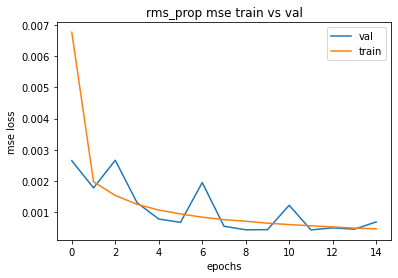

In [63]:
l1, = plt.plot(mse_val)
l2, = plt.plot(mse)
plt.legend([l1, l2], ['val','train'])
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("rms_prop mse train vs val")
plt.savefig("sample_data/rmsprop.png")

In [74]:
mse_val = (np.asarray(history_adam.history['val_dense_5_mse'])+np.asarray(history_adam.history['val_dense_6_mse'])+np.asarray(history_adam.history['val_dense_7_mse'])+np.asarray(history_adam.history['val_dense_8_mse'])+np.asarray(history_adam.history['val_dense_9_mse']))/5
mse = (np.asarray(history_adam.history['dense_5_mse'])+np.asarray(history_adam.history['dense_6_mse'])+np.asarray(history_adam.history['dense_7_mse'])+np.asarray(history_adam.history['dense_8_mse'])+np.asarray(history_adam.history['dense_9_mse']))/5

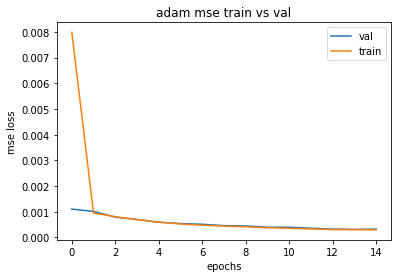

In [75]:
l1, = plt.plot(mse_val)
l2, = plt.plot(mse)
plt.legend([l1, l2], ['val','train'])
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("adam mse train vs val")
plt.savefig("sample_data/adam.png")

In [66]:
mse_val = (np.asarray(history_sgd.history['val_dense_20_mse'])+np.asarray(history_sgd.history['val_dense_21_mse'])+np.asarray(history_sgd.history['val_dense_22_mse'])+np.asarray(history_sgd.history['val_dense_23_mse'])+np.asarray(history_sgd.history['val_dense_24_mse']))/5
mse = (np.asarray(history_sgd.history['dense_20_mse'])+np.asarray(history_sgd.history['dense_21_mse'])+np.asarray(history_sgd.history['dense_22_mse'])+np.asarray(history_sgd.history['dense_23_mse'])+np.asarray(history_sgd.history['dense_24_mse']))/5

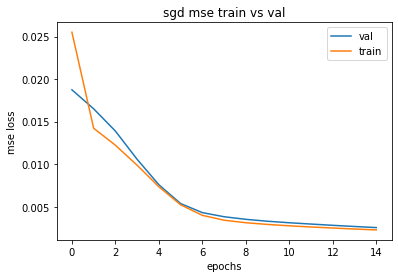

In [67]:
l1, = plt.plot(mse_val)
l2, = plt.plot(mse)
plt.legend([l1, l2], ['val','train'])
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("sgd mse train vs val")
plt.savefig("sample_data/sgd.png")

In [68]:
mse_val = (np.asarray(history_drop.history['val_dense_35_mse'])+np.asarray(history_drop.history['val_dense_36_mse'])+np.asarray(history_drop.history['val_dense_37_mse'])+np.asarray(history_drop.history['val_dense_38_mse'])+np.asarray(history_drop.history['val_dense_39_mse']))/5
mse = (np.asarray(history_drop.history['dense_35_mse'])+np.asarray(history_drop.history['dense_36_mse'])+np.asarray(history_drop.history['dense_37_mse'])+np.asarray(history_drop.history['dense_38_mse'])+np.asarray(history_drop.history['dense_39_mse']))/5

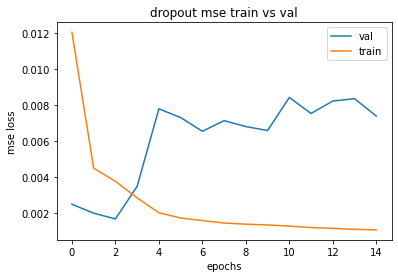

In [69]:
l1, = plt.plot(mse_val)
l2, = plt.plot(mse)
plt.legend([l1, l2], ['val','train'])
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("dropout mse train vs val")
plt.savefig("sample_data/dropout.png")

In [79]:
mse_val = (np.asarray(history_orig.history['val_dense_40_mse'])+np.asarray(history_orig.history['val_dense_41_mse'])+np.asarray(history_orig.history['val_dense_42_mse'])+np.asarray(history_orig.history['val_dense_43_mse'])+np.asarray(history_orig.history['val_dense_44_mse']))/5
mse = (np.asarray(history_orig.history['dense_40_mse'])+np.asarray(history_orig.history['dense_41_mse'])+np.asarray(history_orig.history['dense_42_mse'])+np.asarray(history_orig.history['dense_43_mse'])+np.asarray(history_orig.history['dense_44_mse']))/5


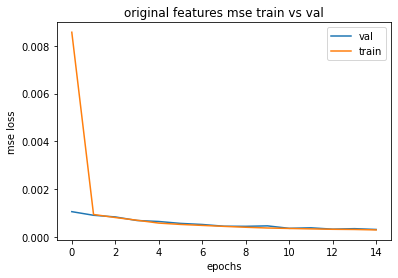

In [80]:
l1, = plt.plot(mse_val)
l2, = plt.plot(mse)
plt.legend([l1, l2], ['val','train'])
plt.title("original features mse train vs val")
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.savefig("sample_data/original_features.png")

The following is used to calculate error between the predicted and actual values in kms.

In [41]:
from math import cos, asin, sqrt, pi
def mse_error(pred, orig):
  res = 0.0
  res_array = []
  lat1 = []
  lat2 = []
  lon1 = []
  lon2 = []
  print(len(pred),len(orig))
  for i in range(len(pred)):
    px, py = lamb.cartesian2geographic(pred[i][0]*lcc_x+lcc_x_min, pred[i][1]*lcc_y+lcc_y_min)
    ox, oy = lamb.cartesian2geographic(orig[i][0]*lcc_x+lcc_x_min, orig[i][1]*lcc_y+lcc_y_min)
    lat1.append(px)
    lon1.append(py)
    lat2.append(ox)
    lon2.append(oy)
    p = pi/180
    a = 0.5- cos((ox-px)*p)/2 + cos(px*p)*cos(ox*p)*(1-cos((oy-py)*p))/2
    rs = 12742/2*asin(sqrt(a))
    res += rs
    res_array.append(rs)
  return res/len(pred),res_array, lat1, lon1, lat2, lon2


The following function is use to plot the error for 10 different storms. The results for individual storms is saved. 

25 25
4099.006873010997
40 40
3905.972989733452
40 40
3895.735483692485
15 15
3357.2650845093845
30 30
4567.251094872782
5 5
4297.427900732169
15 15
3680.2289477064737
15 15
3680.2289477064737
35 35
4295.070248103422
25 25
2287.545610684986


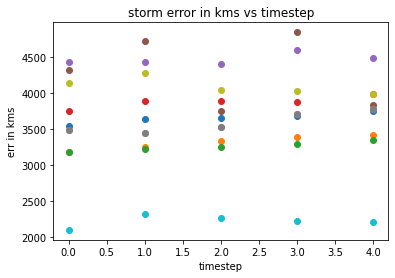

In [42]:
import matplotlib
def plot_storm(test_storm, ij, model):
  stestX, stestY1, stestY2, stestY3, stestY4, stestY5 = [], [], [], [], [], []

  for i in range(len(test_storm)-10-1):
      x = test_storm.iloc[i:(i+10), 2:]
      if len(x)<10:
        break
      stestX.append(x.iloc[:-5,:])
      stestY1.append(x.iloc[-5,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
      stestY2.append(x.iloc[-4,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
      stestY3.append(x.iloc[-3,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
      stestY4.append(x.iloc[-2,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
      stestY5.append(x.iloc[-1,[x.columns.get_loc('lcc_x'),x.columns.get_loc('lcc_y')]])
  stestX = np.array(stestX).astype('float32')
  stestY1 =  np.array(stestY1).astype('float32')
  stestY2 =  np.array(stestY2).astype('float32')
  stestY3 =  np.array(stestY3).astype('float32')
  stestY4 =  np.array(stestY4).astype('float32')
  stestY5 =  np.array(stestY5).astype('float32')

  out1= model.predict(stestX)
  len(out1[0])
  result = []

  for ar in out1:
    result.extend(ar[::5])

  orig = []
  for i in range(0,len(out1[0]),5):
    orig.append(stestY1[i])
    orig.append(stestY2[i])
    orig.append(stestY3[i])
    orig.append(stestY4[i])
    orig.append(stestY5[i])
 
  err, array, lat1, lon1, lat2, lon2 = mse_error(result, orig)
  df = pd.DataFrame(list(zip(lat1, lon1, lat2, lon2, array)), columns=["lat1","lon1","lat2","lon2","err"])
  df.to_csv("storm"+str(ij)+".csv")
  plt.scatter(x=np.arange(len(array[:5])),y=array[:5], marker='o')
  plt.title("storm error in kms vs timestep")
  plt.xlabel("timestep")
  plt.ylabel("err in kms")
  plt.savefig("sample_data/im"+str(ij)+".png")
  return err
i=0
for storm in [test_storm1, test_storm2, test_storm3,kendra, laurie, martha, twentytwo, vince, wilma, zeta]:
  i += 1
  print(plot_storm(storm, i, lstm_adam))

In [43]:
results = lstm_adam.evaluate(testX, [testY1, testY2, testY3, testY4, testY5], batch_size=128)
print("test loss, test acc:", results)

186/186 [==============================] - 6s 11ms/step - loss: 1.1582 - dense_5_loss: 0.2243 - dense_6_loss: 0.2753 - dense_7_loss: 0.1690 - dense_8_loss: 0.2911 - dense_9_loss: 0.1984 - dense_5_mse: 0.2243 - dense_5_mae: 0.4331 - dense_6_mse: 0.2753 - dense_6_mae: 0.4559 - dense_7_mse: 0.1690 - dense_7_mae: 0.3741 - dense_8_mse: 0.2911 - dense_8_mae: 0.4713 - dense_9_mse: 0.1984 - dense_9_mae: 0.3871
test loss, test acc: [1.1581881046295166, 0.22432547807693481, 0.2753247916698456, 0.1690496951341629, 0.29111695289611816, 0.19837160408496857, 0.22432547807693481, 0.43313658237457275, 0.2753247916698456, 0.455853134393692, 0.1690496951341629, 0.3740873634815216, 0.29111695289611816, 0.47125667333602905, 0.19837160408496857, 0.3870559334754944]


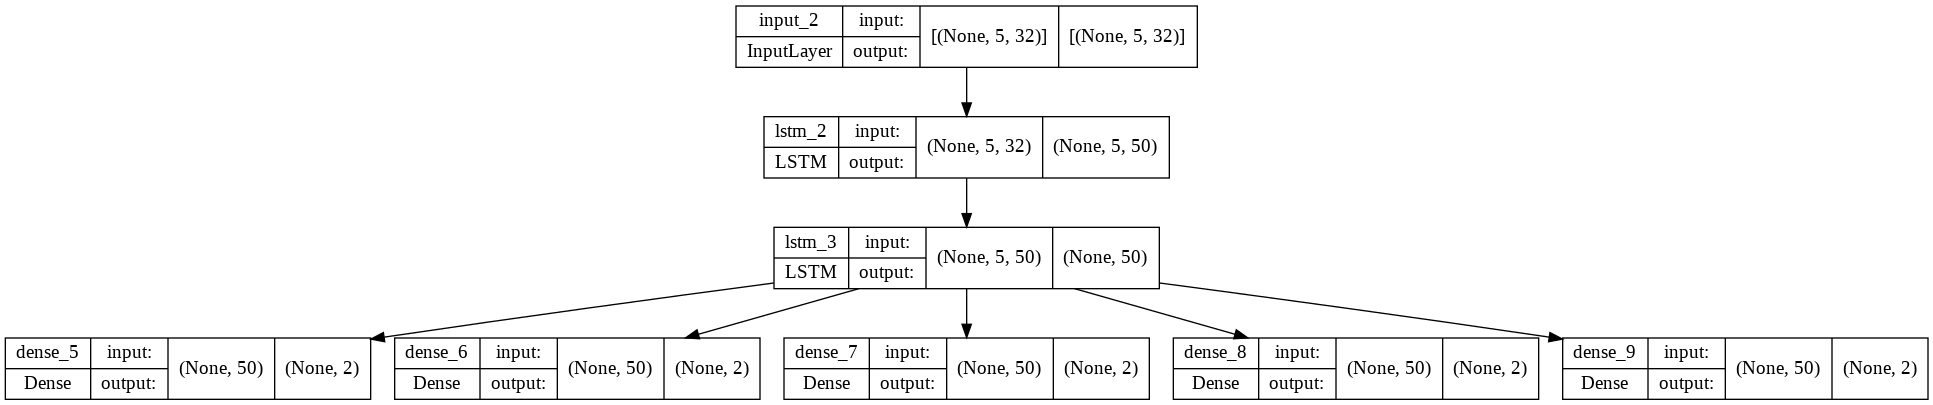

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(lstm_adam, to_file='sample_data/model_plot.png', show_shapes=True, show_layer_names=True)
# print(model.summary())